# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms with can discover patterns in visual data. Such as the camera of  self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the food101 dataset

However, we've modified it to only use two classes (pizza🍕 and steaks🥩) using the image data modification.

> **🔑Note:** We start from smaller dataset so we can experiment quickly and figure what works before scaling up.

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import os

## Inspect the data (become one with it)

A very crucial at the begining of any ML project is becoming one with data.

In [2]:
!ls pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [3]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [4]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

To visualize our images, first let's get the class namesprogrammatically.

In [5]:
# Get the calss name programmatically
data_dir = pathlib.Path("pizza_steak/train")
calss_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Create a list of class name
print(calss_names)

['.DS_Store' 'pizza' 'steak']


In [6]:
# Let's visualize our images

def view_random_image(target_dir, target_class):
    # Set the target directory
    target_floder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_floder), 1)

    # Read in the image and plot it
    img = mpimg.imread(target_floder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img


Image shape: (512, 512, 3)


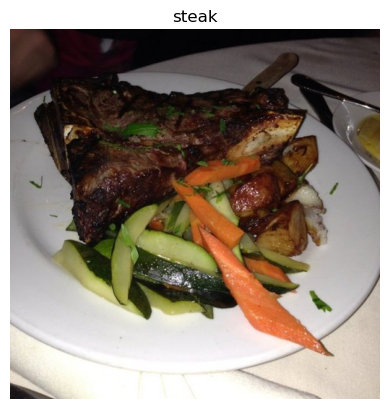

In [20]:
# View a random image from training dataset

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [21]:
# Viewthe img shape
img.shape # Rwturnd width, height, RGB-coclor channel

(512, 512, 3)

>  Normalization to our img between 0&1 🥶 (Tensorflow got function for us)

## End-to-End example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our image
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [27]:
# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all value between 0&1)
train_datagen = IDG(rescale=1./255)
valid_dadagen = IDG(rescale=1./255)

# Set up path to data directory
train_dir = "/Users/psyduck/NeuralNetwork_SelfLearn/pizza_steak/train/"
test_dir = "/Users/psyduck/NeuralNetwork_SelfLearn/pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_dadagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        verbose=1, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Epoch 1/5


2024-01-28 12:42:48.463449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-01-28 12:42:48.486434: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - ETA: 0s - loss: 0.5808 - accuracy: 0.6907

2024-01-28 12:42:59.526010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 13s 260ms/step - loss: 0.5808 - accuracy: 0.6907 - val_loss: 0.5366 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 12s 255ms/step - loss: 0.4464 - accuracy: 0.7980 - val_loss: 0.3582 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 12s 255ms/step - loss: 0.4141 - accuracy: 0.8267 - val_loss: 0.3683 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 12s 256ms/step - loss: 0.3745 - accuracy: 0.8373 - val_loss: 0.3286 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 12s 257ms/step - loss: 0.3220 - accuracy: 0.8647 - val_loss: 0.3079 - val_accuracy: 0.8860
